In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
import matplotlib.gridspec as gridspec

from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import os


In [3]:
plt.style.use("../../assets/stylesheets/soc_base.mplstyle")


In [6]:
df = pd.read_csv('../../data/soc/belgian_shots.csv', index_col=0)


In [ ]:
pitch = VerticalPitch(pitch_type='uefa')
pitch.dim


In [ ]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True,
    label=True,
    tick=True,
    goal_type='box'
)

pitch.draw(ax=ax)

ax.plot([13.84, 13.84], [ax.get_ylim()[0],
        ax.get_ylim()[1]], ls=':', color='red')
ax.plot([54.16, 54.16], [ax.get_ylim()[0],
        ax.get_ylim()[1]], ls=':', color='red')
ax.plot([24.84, 24.84], [ax.get_ylim()[0],
        ax.get_ylim()[1]], ls=':', color='red')
ax.plot([43.16, 43.16], [ax.get_ylim()[0],
        ax.get_ylim()[1]], ls=':', color='red')

ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]],
        [88.5, 88.5], ls=':', color='red')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]],
        [99.5, 99.5], ls=':', color='red')
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [75, 75], ls=':', color='red')


In [7]:
zone_areas = {
    'zone_1': {
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_2': {
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_3': {
        'x_lower_bound': 54.16, 'x_upper_bound': 68,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_4': {
        'x_lower_bound': 0, 'x_upper_bound': 13.84,
        'y_lower_bound': 20, 'y_upper_bound': 88.5,
    },
    'zone_5': {
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_6': {
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 105,
    },
    'zone_7': {
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 88.5, 'y_upper_bound': 99.5,
    },
    'zone_8': {
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 99.5, 'y_upper_bound': 105,
    },
    'zone_9': {
        'x_lower_bound': 13.84, 'x_upper_bound': 24.84,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_10': {
        'x_lower_bound': 43.16, 'x_upper_bound': 54.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_11': {
        'x_lower_bound': 24.84, 'x_upper_bound': 43.16,
        'y_lower_bound': 75, 'y_upper_bound': 88.5,
    },
    'zone_12': {
        'x_lower_bound': 13.84, 'x_upper_bound': 54.16,
        'y_lower_bound': 20, 'y_upper_bound': 75,
    }
}


In [8]:
def assign_shot_zone(x, y):
    global zone_areas

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone


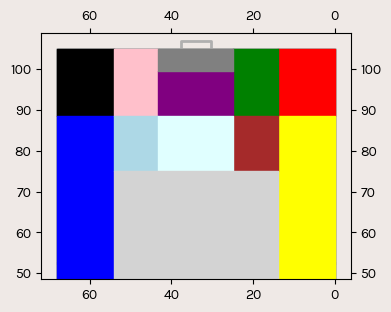

In [9]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = plt.subplot(111)
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    axis=True,
    label=True,
    tick=True,
    goal_type='box'
)
pitch.draw(ax=ax)

zone_colors = {
    'zone_1': 'black',
    'zone_2': 'red',
    'zone_3': 'blue',
    'zone_4': 'yellow',
    'zone_5': 'green',
    'zone_6': 'pink',
    'zone_7': 'purple',
    'zone_8': 'grey',
    'zone_9': 'brown',
    'zone_10': 'lightblue',
    'zone_11': 'lightcyan',
    'zone_12': 'lightgrey'
}

for zone in zone_colors:
    x_lim = [zone_areas[zone]['x_lower_bound'],
             zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(x=x_lim, y1=y1, y2=y2, color=zone_colors[zone])


In [9]:
df.rename(columns={'x': 'y', 'y': 'x'}, inplace=True)
df = df[df['situation'] != 'Penalty'].reset_index(drop=True)
df['zone_area'] = [assign_shot_zone(x, y) for x, y in zip(df['x'], df['y'])]


In [10]:
data = df.groupby(['teamId', 'teamName', 'teamColor', 'zone_area']).apply(
    lambda x: x.shape[0]).reset_index()
data.rename(columns={0: 'num_shots'}, inplace=True)

total_shots = data.groupby(['teamId'])['num_shots'].sum().reset_index()
total_shots.rename(columns={'num_shots': 'total_shots'}, inplace=True)

data = pd.merge(data, total_shots, on='teamId', how='left')
data['pct_shots'] = data['num_shots']/data['total_shots']


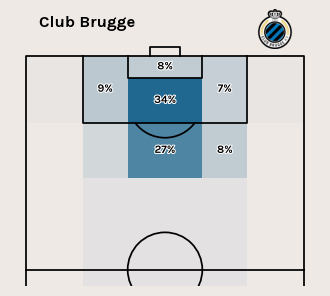

In [12]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = plt.subplot(111)

pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    # axis=True,
    # tick=True,
    # label=True,
    goal_type='box',
    linewidth=1.25,
    line_color='black',
    spot_scale=0.0
)

pitch.draw(ax=ax)

plot_df = data[data['teamId'] == 8342]
max_value = plot_df['pct_shots'].max()
team_name = plot_df['teamName'].iloc[0]
team_id = plot_df['teamId'].iloc[0]
team_color = plot_df['teamColor'].iloc[0]

for zone in plot_df['zone_area']:
    shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
    x_lim = [zone_areas[zone]['x_lower_bound'],
             zone_areas[zone]['x_upper_bound']]
    y1 = zone_areas[zone]['y_lower_bound']
    y2 = zone_areas[zone]['y_upper_bound']
    ax.fill_between(
        x=x_lim,
        y1=y1, y2=y2,
        color=team_color, alpha=(shot_pct/max_value),
        zorder=0, ec='None'
    )
    if shot_pct > .05:
        x_pos = x_lim[0] + abs(x_lim[0]-x_lim[1])/2
        y_pos = y1 + abs(y1-y2)/2
        text_ = ax.annotate(
            xy=(x_pos, y_pos),
            text=f'{shot_pct:.0%}',
            ha='center', va='center',
            color='black',
            weight='bold',
            size=8
        )
        text_.set_path_effects([path_effects.Stroke(
            linewidth=1.5, foreground='white'), path_effects.Normal()])

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
def DC_to_NFC(x): return FC_to_NFC(DC_to_FC(x))


ax_coords = DC_to_NFC((12, 101))
ax_size = .1
image_ax = fig.add_axes(
    [ax_coords[0], ax_coords[1], ax_size, ax_size],
    fc='None'
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
club_icon = Image.open(urllib.request.urlopen(
    f'{fotmob_url}{team_id:.0f}.png'))
image_ax.imshow(club_icon)
image_ax.axis('off')

ax_text(
    x=65, y=115,
    s=team_name,
    ax=ax,
    weight='bold',
    size=12
)


In [17]:
def plot_shot_location(ax, fig, teamId, df=data):
    global zone_areas
    data = df.copy()

    pitch = VerticalPitch(
        pitch_type='uefa',
        half=True,
        # axis=True,
        # tick=True,
        # label=True,
        goal_type='box',
        linewidth=1.25,
        line_color='black',
        spot_scale=0.0
    )
    pitch.draw(ax=ax)

    plot_df = data[data['teamId'] == teamId]
    max_value = plot_df['pct_shots'].max()
    team_name = plot_df['teamName'].iloc[0]
    team_color = plot_df['teamColor'].iloc[0]
    # team_color = '#DA70D6'
    team_id = plot_df['teamId'].iloc[0]
    total_shots = plot_df['total_shots'].iloc[0]

    ax.plot([13.84, 13.84], [40, 88.5], ls='--', color='black', lw=1)
    ax.plot([54.16, 54.16], [40, 88.5], ls='--', color='black', lw=1)
    ax.plot([24.84, 24.84], [99.5, 88.5], ls='--', color='black', lw=1)
    ax.plot([43.16, 43.16], [99.5, 88.5], ls='--', color='black', lw=1)

    ax.plot([68, 54.16], [88.5, 88.5], ls='--', color='black', lw=1)
    ax.plot([.5, 13.84], [88.5, 88.5], ls='--', color='black', lw=1)
    ax.plot([13.84, 54.16], [75, 75], ls='--', color='black', lw=1)

    for zone in plot_df['zone_area']:
        shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_shots'].iloc[0]
        x_lim = [zone_areas[zone]['x_lower_bound'],
                 zone_areas[zone]['x_upper_bound']]
        y1 = zone_areas[zone]['y_lower_bound']
        y2 = zone_areas[zone]['y_upper_bound']
        ax.fill_between(
            x=x_lim,
            y1=y1, y2=y2,
            color=team_color, alpha=(shot_pct/max_value),
            zorder=0, ec='None'
        )
        if shot_pct > .05:
            x_pos = x_lim[0] + abs(x_lim[0]-x_lim[1])/2
            if y1 == 20:
                y1 = 58
            y_pos = y1 + abs(y1-y2)/2
            text_ = ax.annotate(
                xy=(x_pos, y_pos),
                text=f'{shot_pct:.0%}',
                ha='center', va='center',
                color='black', weight='bold',
                size=7
            )
            text_.set_path_effects(
                [path_effects.Stroke(
                    linewidth=1.5, foreground='white'), path_effects.Normal()]
            )
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    def DC_to_NFC(x): return FC_to_NFC(DC_to_FC(x))

    ax_coords = DC_to_NFC((11, 89.5))
    ax_size = .021
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size],
                            fc='None', anchor='C')
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    # club_icon = Image.open(urllib.request.urlopen(
    #     f'{fotmob_url}{team_id:.0f}.png'))
    # image_ax.imshow(club_icon)
    image_ax.axis('off')

    ax_text(
        x=65, y=120,
        s=f'{team_name}< | shots {total_shots:.0f}>',
        highlight_textprops=[{'size': 6, 'weight': 'normal'}],
        ax=ax,
        weight='bold',
        size=8,
        font='DM Sans'
    )

    return ax


In [13]:
order_teams = total_shots.sort_values(by='total_shots', ascending=False)


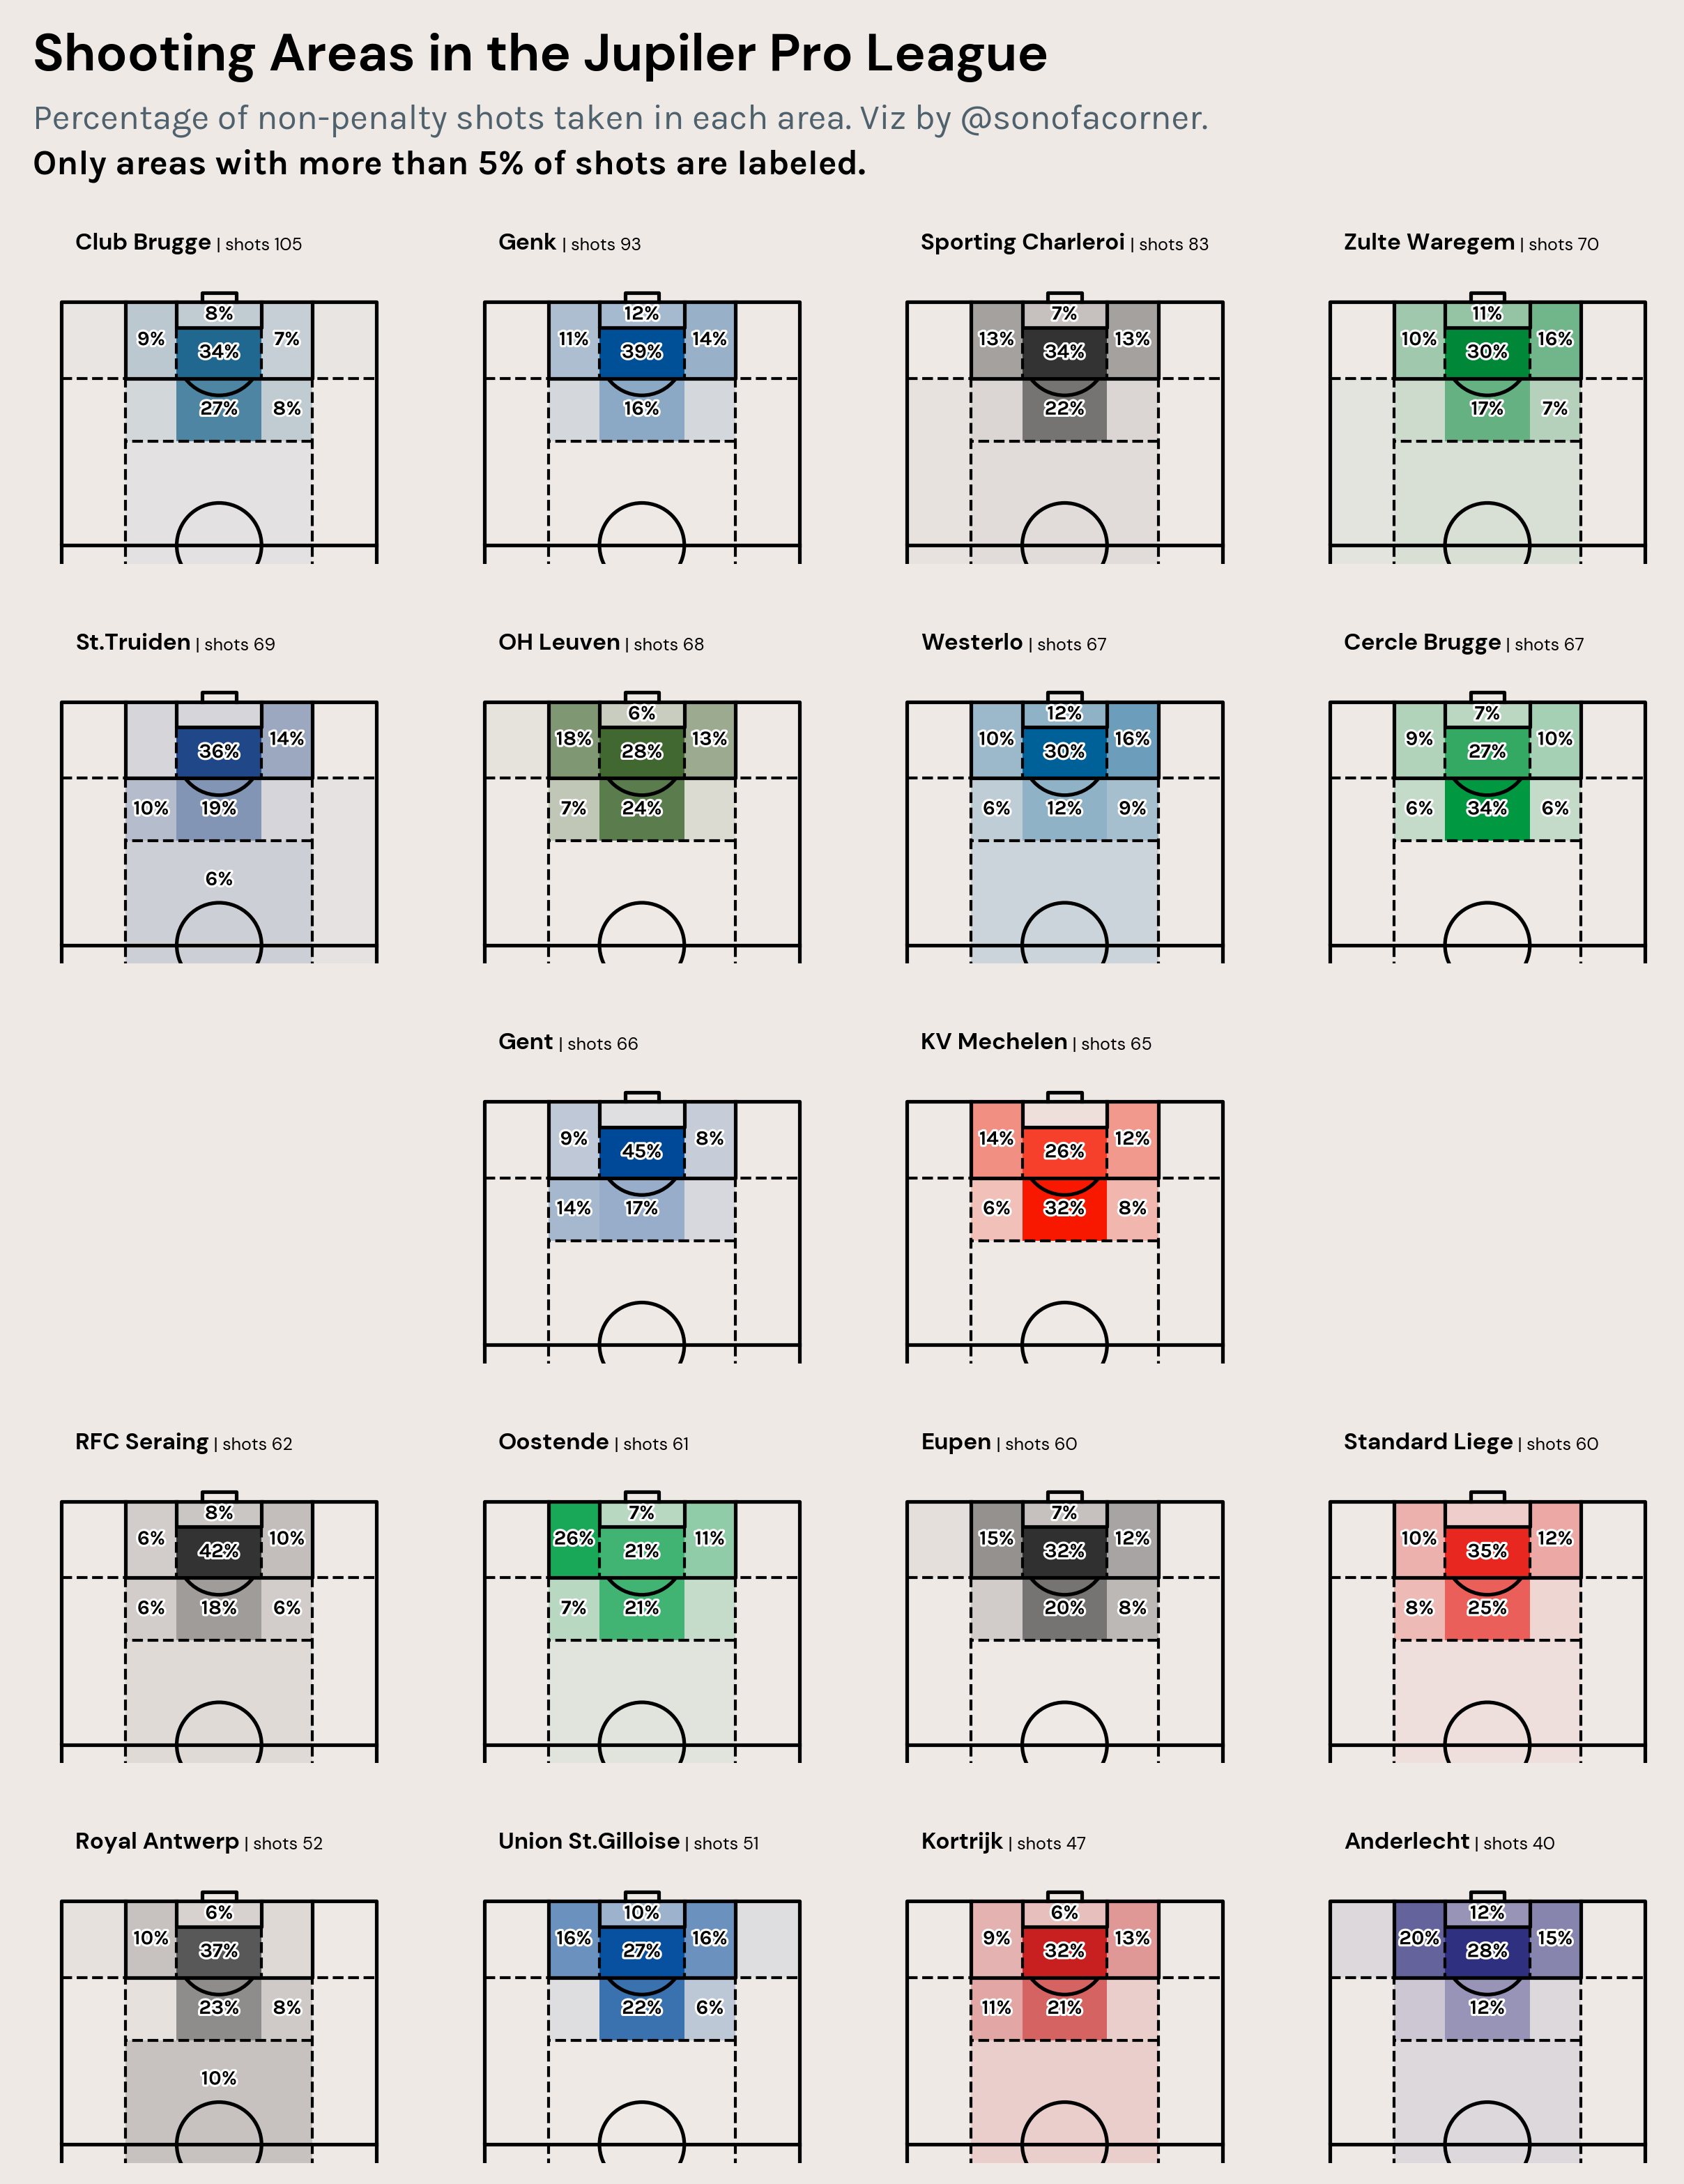

In [19]:
layout_ = '''
    ABCD
    EFGH
    .IJ.
    KLMN
    OPQR
'''

height_ratios = [1]*5

fig = plt.figure(figsize=(10, 12), dpi=300)
axs = fig.subplot_mosaic(
    layout_,
    gridspec_kw={
        'height_ratios': height_ratios,
    }
)

counter = 0
for k, ax in axs.items():
    teamId = order_teams['teamId'].iloc[counter]
    plot_shot_location(ax, fig, teamId=teamId)
    counter += 1

fig_text(
    x=0.12, y=.95,
    s="Shooting Areas in the Jupiler Pro League",
    va="bottom", ha="left",
    fontsize=18, color="black", font="DM Sans", weight="bold"
)
fig_text(
    x=0.12, y=.91,
    s="Percentage of non-penalty shots taken in each area. Viz by @sonofacorner.\n<Only areas with more than 5% of shots are labeled.>",
    highlight_textprops=[{"weight": "bold", "color": "black"}],
    va="bottom", ha="left",
    fontsize=12, color="#4E616C", font="Karla"
)

# plt.savefig(
#     "../../figures/jupiler_shots.png",
#     dpi=600,
#     facecolor="#EFE9E6",
#     bbox_inches="tight",
#     edgecolor="none",
#     transparent=False
# )
